### Deliverable 1: Preprocessing the Data for a Neural Network

In [103]:
#  Import and read the charity_data.csv.
import pandas as pd
import tensorflow as tf
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [104]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

In [105]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [106]:
# Look at APPLICATION_TYPE value counts for binning
bin_analysis = application_df["APPLICATION_TYPE"].value_counts()
bin_analysis

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

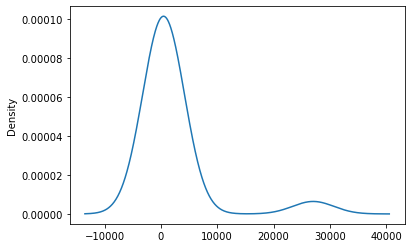

In [107]:
# Visualize the value counts of APPLICATION_TYPE
bin_analysis.plot.density()

In [108]:
# Determine which values to replace if counts are less than ...?
replace_application = list(bin_analysis[bin_analysis < 750].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app, "Other")

# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [109]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

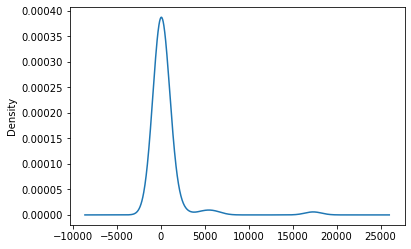

In [110]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [111]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 2500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls, "Other")

# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [112]:
# Generate our categorical variable lists
categories = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
categories

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [113]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[categories]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(categories)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [114]:
# Merge one-hot encoded features and drop the originals
preprocessed_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=categories)
preprocessed_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
# Split our preprocessed data into our features and target arrays
y = preprocessed_df["IS_SUCCESSFUL"].values
X = preprocessed_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/chris.weber/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [117]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=1000, input_dim=len(X_train[0]), activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=100, input_dim=len(X_train[0]), activation="relu"))

# Final layer for fun
nn.add(tf.keras.layers.Dense(units=10, input_dim=len(X_train[0]), activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1000)              39000     
                                                                 
 dense_20 (Dense)            (None, 100)               100100    
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 140,121
Trainable params: 140,121
Non-trainable params: 0
_________________________________________________________________


In [118]:
# Compile the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Checkpoints are cool, let's use one.
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/best_model.hdf5"

# Create a callback that saves the best model as it progresses
checkpoint = ModelCheckpoint(checkpoint_path, verbose=1, monitor='val_accuracy', save_best_only=True)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [119]:
# Train the model
## another fancy trick, Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

history = nn.fit(X_train_scaled, y_train, epochs=1000, callbacks=[checkpoint, es], validation_split=0.3,
                 steps_per_epoch=len(X_train) // 32)

Epoch 1/1000
794/803 [============================>.] - ETA: 0s - loss: 0.5757 - accuracy: 0.7204
Epoch 1: val_accuracy improved from -inf to 0.71858, saving model to checkpoints/best_model.hdf5
803/803 [==============================] - 3s 3ms/step - loss: 0.5759 - accuracy: 0.7202 - val_loss: 0.5762 - val_accuracy: 0.7186
Epoch 2/1000
781/803 [============================>.] - ETA: 0s - loss: 0.5622 - accuracy: 0.7289
Epoch 2: val_accuracy did not improve from 0.71858
803/803 [==============================] - 2s 2ms/step - loss: 0.5627 - accuracy: 0.7283 - val_loss: 0.5686 - val_accuracy: 0.7157
Epoch 3/1000
781/803 [============================>.] - ETA: 0s - loss: 0.5595 - accuracy: 0.7327
Epoch 3: val_accuracy improved from 0.71858 to 0.72324, saving model to checkpoints/best_model.hdf5
803/803 [==============================] - 2s 2ms/step - loss: 0.5597 - accuracy: 0.7325 - val_loss: 0.5674 - val_accuracy: 0.7232
Epoch 4/1000
802/803 [============================>.] - ETA: 0s -

In [120]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5641 - accuracy: 0.7228 - 390ms/epoch - 1ms/step
Loss: 0.5640957951545715, Accuracy: 0.7227988243103027


In [123]:
# Loading weights from best model
nn.load_weights('checkpoints/best_model.hdf5')

# Saving all model
nn.save('checkpoints/model.hdf5')

# Optimize model to get to 75% accuracy.

Where did we land?

Text(0.5, 1.0, 'loss')

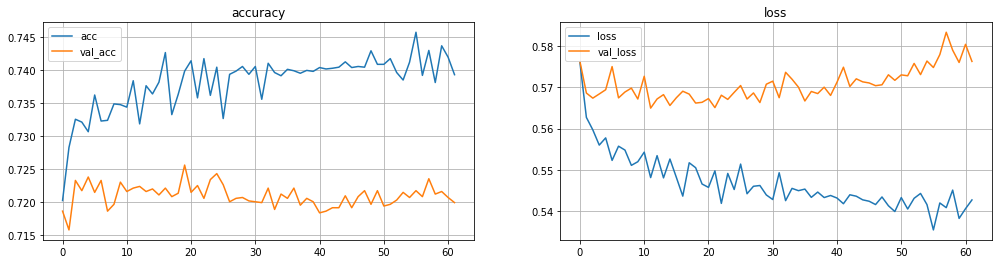

In [125]:
import matplotlib.pyplot as plt

# Plot learning curves
fig = plt.figure(figsize=(17, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

Kind of looks like accuracy got over 75 %, But I learned how to keep training a model.  So let's try

In [126]:
from tensorflow.keras.models import load_model

previous_model = load_model('checkpoints/model.hdf5')
new_history = previous_model.fit(X_train_scaled, y_train, epochs=1000, callbacks=[checkpoint, es], validation_split=0.3,
                                 steps_per_epoch=len(X_train) // 32)


Epoch 1/1000
793/803 [============================>.] - ETA: 0s - loss: 0.5497 - accuracy: 0.7371
Epoch 1: val_accuracy did not improve from 0.72558
803/803 [==============================] - 3s 3ms/step - loss: 0.5502 - accuracy: 0.7369 - val_loss: 0.5654 - val_accuracy: 0.7212
Epoch 2/1000
785/803 [============================>.] - ETA: 0s - loss: 0.5467 - accuracy: 0.7386
Epoch 2: val_accuracy did not improve from 0.72558
803/803 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7380 - val_loss: 0.5688 - val_accuracy: 0.7212
Epoch 3/1000
783/803 [============================>.] - ETA: 0s - loss: 0.5457 - accuracy: 0.7399
Epoch 3: val_accuracy did not improve from 0.72558
803/803 [==============================] - 2s 2ms/step - loss: 0.5462 - accuracy: 0.7394 - val_loss: 0.5678 - val_accuracy: 0.7201
Epoch 4/1000
789/803 [============================>.] - ETA: 0s - loss: 0.5464 - accuracy: 0.7387
Epoch 4: val_accuracy did not improve from 0.72558
803/803 [==

In [127]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5601 - accuracy: 0.7247 - 551ms/epoch - 2ms/step
Loss: 0.5600528120994568, Accuracy: 0.7246647477149963


# Nope, ok, I have to try one more time?

Let's do a different model.

In [129]:
mm = tf.keras.models.Sequential()

# First hidden layer
mm.add(tf.keras.layers.Dense(units=20, input_dim=len(X_train[0]), activation="relu"))

# Second hidden layer
mm.add(tf.keras.layers.Dense(units=10, input_dim=len(X_train[0]), activation="relu"))

# Output layer
mm.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
mm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 20)                780       
                                                                 
 dense_27 (Dense)            (None, 10)                210       
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [130]:
# Checkpoints are cool, let's use one.
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/best_mm_model.hdf5"

# Create a callback that saves the best model as it progresses
mm_checkpoint = ModelCheckpoint(checkpoint_path, verbose=1, monitor='val_accuracy', save_best_only=True)
mm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [131]:
mm_history = mm.fit(X_train_scaled, y_train, epochs=1000, callbacks=[mm_checkpoint, es], validation_split=0.3,
                    steps_per_epoch=len(X_train) // 32)

Epoch 1/1000
801/803 [============================>.] - ETA: 0s - loss: 0.6096 - accuracy: 0.6913
Epoch 1: val_accuracy improved from -inf to 0.71249, saving model to checkpoints/best_mm_model.hdf5
803/803 [==============================] - 2s 2ms/step - loss: 0.6097 - accuracy: 0.6912 - val_loss: 0.5795 - val_accuracy: 0.7125
Epoch 2/1000
789/803 [============================>.] - ETA: 0s - loss: 0.5640 - accuracy: 0.7253
Epoch 2: val_accuracy improved from 0.71249 to 0.71443, saving model to checkpoints/best_mm_model.hdf5
803/803 [==============================] - 1s 2ms/step - loss: 0.5641 - accuracy: 0.7252 - val_loss: 0.5734 - val_accuracy: 0.7144
Epoch 3/1000
790/803 [============================>.] - ETA: 0s - loss: 0.5600 - accuracy: 0.7257
Epoch 3: val_accuracy did not improve from 0.71443
803/803 [==============================] - 1s 2ms/step - loss: 0.5605 - accuracy: 0.7251 - val_loss: 0.5727 - val_accuracy: 0.7133
Epoch 4/1000
784/803 [============================>.] - ETA

In [133]:
# Evaluate the model using the test data
model_loss, model_accuracy = mm.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5631 - accuracy: 0.7230 - 235ms/epoch - 878us/step
Loss: 0.5631239414215088, Accuracy: 0.7230320572853088
268/268 - 0s - loss: 0.5631 - accuracy: 0.7230 - 242ms/epoch - 904us/step
Loss: 0.5631239414215088, Accuracy: 0.7230320572853088


In [136]:
# Loading weights from best model
mm.load_weights('checkpoints/best_mm_model.hdf5')

# Saving all model
mm.save('checkpoints/mm_model.hdf5')

Still didn't make it.